In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy 
from scipy import stats,signal
import statsmodels.api as sm

import time

path = 'Real-time_v2'

In [2]:
import serial, time

def Arduino(n):
    ser = serial.Serial(port='/dev/cu.usbmodem1411', baudrate=250000)

    if ser.isOpen():
        print("{} connected!".format(ser.port))
        try:
            start = time.time()
            
            gryo = {'X':[], 'Y': [], 'Z': []}
            acc = {'X':[], 'Y': [], 'Z': []}
            while True:  
        
                try:
                  
                    line_byte = ser.readline().strip().decode("UTF-8")
                  
                except: 
                   
                    continue
                    
                    
                if 'Gryo' in line_byte:
                    try:
                        line = line_byte.split('\t')
                        gryo['X'].append(line[1])
                        gryo['Y'].append(line[2])
                        gryo['Z'].append(line[3])
                        
                    except:
                        continue

                if 'Acc' in line_byte:
                    try:
                        line = line_byte.split('\t')
                        acc['X'].append(line[1])
                        acc['Y'].append(line[2])
                        acc['Z'].append(line[3])
                       
                    except:
                        continue
                    
                    if time.time() - start > n:
                        break
            return gryo, acc

        except KeyboardInterrupt:
            print("KeyboardInterrupt has been caught.")

In [4]:
a, b = Arduino(2.56)

/dev/cu.usbmodem1411 connected!


In [5]:
len(a['X'])

67

In [ ]:
s,m  = 10, 90

# Walking Up

In [ ]:
time.sleep(5)
print('start')
gryo_wa1,acc_wa1 = Arduino(s)
print(len(gryo_wa1['X']))

wa_a1 = pd.DataFrame(acc_wa1)
wa_g1 = pd.DataFrame(gryo_wa1)

In [ ]:
time.sleep(5)
print('start')
gryo_wa2,acc_wa2 = Arduino(s)
print(len(gryo_wa2['X']))

wa_a2 = pd.DataFrame(acc_wa2)
wa_g2 = pd.DataFrame(gryo_wa2)

In [ ]:
time.sleep(5)
print('start')
gryo_wa3,acc_wa3 = Arduino(s)
print(len(gryo_wa3['X']))

wa_a3 = pd.DataFrame(acc_wa3)
wa_g3 = pd.DataFrame(gryo_wa3)

In [ ]:
time.sleep(5)
print('start')
gryo_wa4,acc_wa4 = Arduino(s)
print(len(gryo_wa4['X']))

wa_a4 = pd.DataFrame(acc_wa4)
wa_g4 = pd.DataFrame(gryo_wa4)

In [ ]:
w_up_acc = pd.concat( [pd.DataFrame(wa_a1),pd.DataFrame(wa_a2),pd.DataFrame(wa_a3),pd.DataFrame(wa_a4)], axis = 0).reset_index()
w_up_gryo = pd.concat( [pd.DataFrame(wa_g1),pd.DataFrame(wa_g2),pd.DataFrame(wa_g3),pd.DataFrame(wa_g4)], axis = 0).reset_index()

w_up_acc.drop(['index'],axis = 1, inplace = True)
w_up_gryo.drop(['index'],axis = 1, inplace = True)

In [ ]:
w_up_acc

In [ ]:
for i in range (w_up_gryo.shape[0]):
    x,y,z = w_up_gryo.iloc[i,:].values
   
    if 'Gryo' in x:
        print(i)


## Walking downstairs

In [ ]:
time.sleep(5)
print('start')
gryo_base,acc_base = Arduino(s)
print(len(gryo_base['X']))

wd1 = pd.DataFrame(acc_base)
wd2 = pd.DataFrame(gryo_base)

In [ ]:
time.sleep(5)
print('start')
gryo_base,acc_base = Arduino(s)
print(len(gryo_base['X']))

wd3 = pd.DataFrame(acc_base)
wd4 = pd.DataFrame(gryo_base)

In [ ]:
time.sleep(5)
print('start')
gryo_base,acc_base = Arduino(s)
print(len(gryo_base['X']))

wd5 = pd.DataFrame(acc_base)
wd6 = pd.DataFrame(gryo_base)

In [ ]:
time.sleep(5)
print('start')
gryo_base,acc_base = Arduino(s)
print(len(gryo_base['X']))

wd7 = pd.DataFrame(acc_base)
wd8 = pd.DataFrame(gryo_base)

In [ ]:
w_down_acc = pd.concat( [pd.DataFrame(wd1),pd.DataFrame(wd3),pd.DataFrame(wd5)], axis = 0).reset_index()
w_down_gryo = pd.concat( [pd.DataFrame(wd2),pd.DataFrame(wd4),pd.DataFrame(wd6)], axis = 0).reset_index()

w_down_acc.drop(['index'],axis = 1, inplace = True)
w_down_gryo.drop(['index'],axis = 1, inplace = True)

In [ ]:
w_down_gryo.drop(728, inplace = True)

In [ ]:
w_down_acc.drop(729, inplace = True)

In [ ]:
for i in range (w_down_acc.shape[0]):
    x,y,z = w_down_acc.iloc[i,:].values
    print(i,x,y,z)

    

## walking downstair

In [ ]:
walking_down_ACC = w_down_acc
walking_down_GRYO = w_down_gryo

col = ['X', 'Y', 'Z']
for i in col:
    walking_down_ACC[[str(i)]] = walking_down_ACC[[i]].astype(float)
    walking_down_GRYO[[str(i)]] = walking_down_GRYO[[i]].astype(float)

pl = plt.figure(1)
walking_down_ACC.plot()


plt.figure(2)
walking_down_GRYO.plot()

plt.show()

In [ ]:
walking_down_ACC.to_csv('{0}/walking_down_acc3.csv'.format(path), index = None)
walking_down_GRYO.to_csv('{0}/walking_down_gryo3.csv'.format(path), index = None)

## walking upstair

In [ ]:
walking_up_ACC = w_up_acc
walking_up_GRYO = w_up_gryo

col = ['X', 'Y', 'Z']
for i in col:
    walking_up_ACC[[str(i)]] = walking_up_ACC[[i]].astype(float)
    walking_up_GRYO[[str(i)]] = walking_up_GRYO[[i]].astype(float)
    
pl = plt.figure(1)
walking_up_ACC.plot()


plt.figure(2)
walking_up_GRYO.plot()



plt.show()

In [ ]:
walking_up_ACC.to_csv('{0}/walking_up_acc3.csv'.format(path), index = None)
walking_up_GRYO.to_csv('{0}/walking_up_gryo3.csv'.format(path), index = None)

## Walking

In [ ]:
time.sleep(2)
print('start')
gryo_walk,acc_walk = Arduino(m)
print(len(gryo_walk['X']))

walking_ACC = pd.DataFrame(acc_walk)
walking_GRYO = pd.DataFrame(gryo_walk)

col = ['X', 'Y', 'Z']
for i in col:
    walking_ACC[[str(i)]] = walking_ACC[[i]].astype(float)
    walking_GRYO[[str(i)]] = walking_GRYO[[i]].astype(float)
    
pl = plt.figure(1)
walking_ACC.plot()


plt.figure(2)
walking_GRYO.plot()

plt.show()

In [ ]:
walking_ACC.to_csv('{0}/walking_acc.csv'.format(path), index = None)
walking_GRYO.to_csv('{0}/walking_gryo.csv'.format(path), index = None)

## Lying

In [ ]:
print('start')
gryo_lay,acc_lay = Arduino(m)
print(len(gryo_lay['X']))

lying_ACC = pd.DataFrame(acc_lay)
lying_GRYO = pd.DataFrame(gryo_lay)

col = ['X', 'Y', 'Z']
for i in col:
    lying_ACC[[str(i)]] = lying_ACC[[i]].astype(float)
    lying_GRYO[[str(i)]] = lying_GRYO[[i]].astype(float)
    
pl = plt.figure(1)
lying_ACC.plot()


plt.figure(2)
lying_GRYO.plot()

plt.show()    

In [ ]:
lying_ACC.to_csv('{0}/lying_acc.csv'.format(path), index = None)
lying_GRYO.to_csv('{0}/lying_gryo.csv'.format(path), index = None)

## Sitting

In [23]:
def sit_collect():
    gryo_sit, acc_sit = Arduino(s)
    print(len(gryo_sit['X']))

    sit_a = pd.DataFrame(acc_sit)
    sit_g = pd.DataFrame(gryo_sit)
    
    return sit_a, sit_g

In [24]:
sit_a1, sit_g1 = sit_collect()

/dev/cu.usbmodem1411 connected!
565


In [25]:
sit_a2, sit_g2 = sit_collect()

/dev/cu.usbmodem1411 connected!
565


In [26]:
sit_a3, sit_g3 = sit_collect()

/dev/cu.usbmodem1411 connected!
565


In [27]:
sit_a4, sit_g4 = sit_collect()

/dev/cu.usbmodem1411 connected!
565


In [28]:
sit_a5, sit_g5 = sit_collect()

/dev/cu.usbmodem1411 connected!
566


In [29]:
sit_acc = pd.concat( [pd.DataFrame(sit_a1), pd.DataFrame(sit_a2), pd.DataFrame(sit_a3), pd.DataFrame(sit_a4), pd.DataFrame(sit_a5)], axis = 0).reset_index()
sit_gryo = pd.concat( [pd.DataFrame(sit_g1),pd.DataFrame(sit_g2),pd.DataFrame(sit_g3), pd.DataFrame(sit_g4), pd.DataFrame(sit_g5)], axis = 0).reset_index()

sit_acc.drop(['index'],axis = 1, inplace = True)
sit_gryo.drop(['index'],axis = 1, inplace = True)

start
2826


<Figure size 432x288 with 0 Axes>

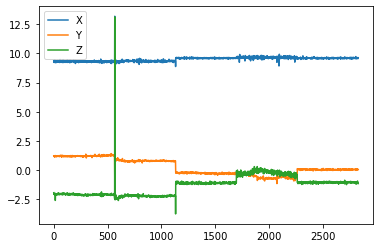

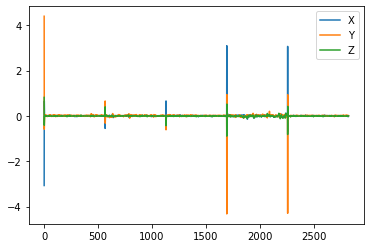

In [30]:
print('start')
# gryo_sitting,acc_sitting = Arduino(m)
gryo_sitting,acc_sitting = sit_gryo,sit_acc

print(len(gryo_sitting['X']))

sitting_ACC = pd.DataFrame(acc_sitting)
sitting_GRYO = pd.DataFrame(gryo_sitting)

col = ['X', 'Y', 'Z']
for i in col:
    sitting_ACC[[str(i)]] = sitting_ACC[[i]].astype(float)
    sitting_GRYO[[str(i)]] = sitting_GRYO[[i]].astype(float)
   


pl = plt.figure(1)
sitting_ACC.plot()

plt.figure(2)
sitting_GRYO.plot()

plt.show()

In [31]:
sitting_ACC.to_csv('{0}/sitting_acc1.csv'.format(path), index = None)
sitting_GRYO.to_csv('{0}/sitting_gryo1.csv'.format(path), index = None)

## Standing

In [17]:
def stay_collect():
    gryo_stay, acc_stay = Arduino(s)
    print(len(gryo_stay['X']))

    stay_a = pd.DataFrame(acc_stay)
    stay_g = pd.DataFrame(gryo_stay)
    
    return stay_a, stay_g

In [9]:
s_a1, s_g1 = stay_collect()

/dev/cu.usbmodem1411 connected!
565


In [12]:
s_a2, s_g2 = stay_collect()

/dev/cu.usbmodem1411 connected!
565


In [13]:
s_a3, s_g3 = stay_collect()

/dev/cu.usbmodem1411 connected!
566


In [14]:
s_a4 ,s_g4 = stay_collect()

/dev/cu.usbmodem1411 connected!
565


In [15]:
s_acc = pd.concat( [pd.DataFrame(s_a1), pd.DataFrame(s_a2), pd.DataFrame(s_a3), pd.DataFrame(s_a4)], axis = 0).reset_index()
s_gryo = pd.concat( [pd.DataFrame(s_g1),pd.DataFrame(s_g2),pd.DataFrame(s_g3), pd.DataFrame(s_g4)], axis = 0).reset_index()

s_acc.drop(['index'],axis = 1, inplace = True)
s_gryo.drop(['index'],axis = 1, inplace = True)

start
2261


<Figure size 432x288 with 0 Axes>

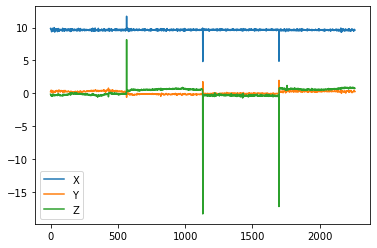

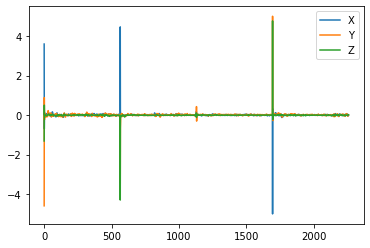

In [16]:
print('start')
# gryo_stand,acc_stand = Arduino(m)
gryo_stand,acc_stand = s_gryo, s_acc
print(len(gryo_stand['X']))

staying_ACC = pd.DataFrame(acc_stand)
staying_GRYO = pd.DataFrame(gryo_stand)

col = ['X', 'Y', 'Z']
for i in col:
    staying_ACC[[str(i)]] = staying_ACC[[i]].astype(float)
    staying_GRYO[[str(i)]] = staying_GRYO[[i]].astype(float)
    

pl = plt.figure(1)
staying_ACC.plot()


plt.figure(2)
staying_GRYO.plot()

plt.show()

In [18]:
staying_ACC.to_csv('{0}/staying_acc.csv'.format(path), index = None)
staying_GRYO.to_csv('{0}/staying_gryo.csv'.format(path), index = None)